Jared Crebo 30085839

PHYS 381: Assignment 5

Curve fitting, optimizations, and finite difference methods

Kernel: Python 3.10.11 | IDE: Visual Studio Code

3 Taylor series and finite difference methods

Text(0.5, 1.05, 'Finite Differencing Schemes ($\\Delta$ = 0.01)')

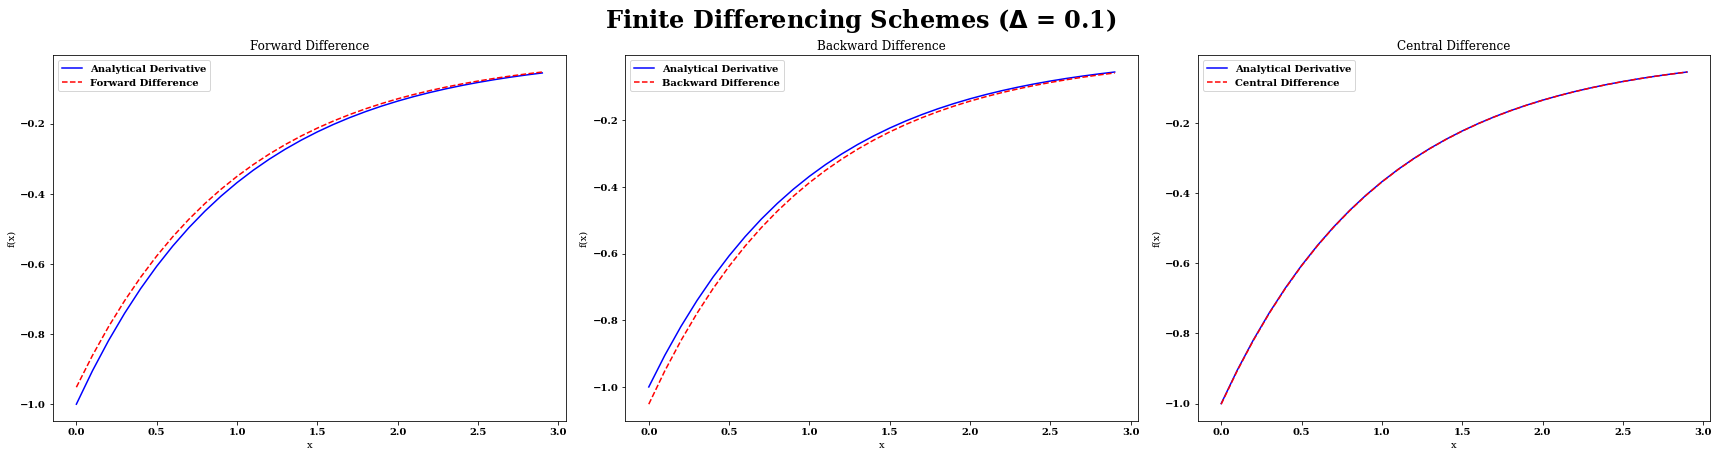

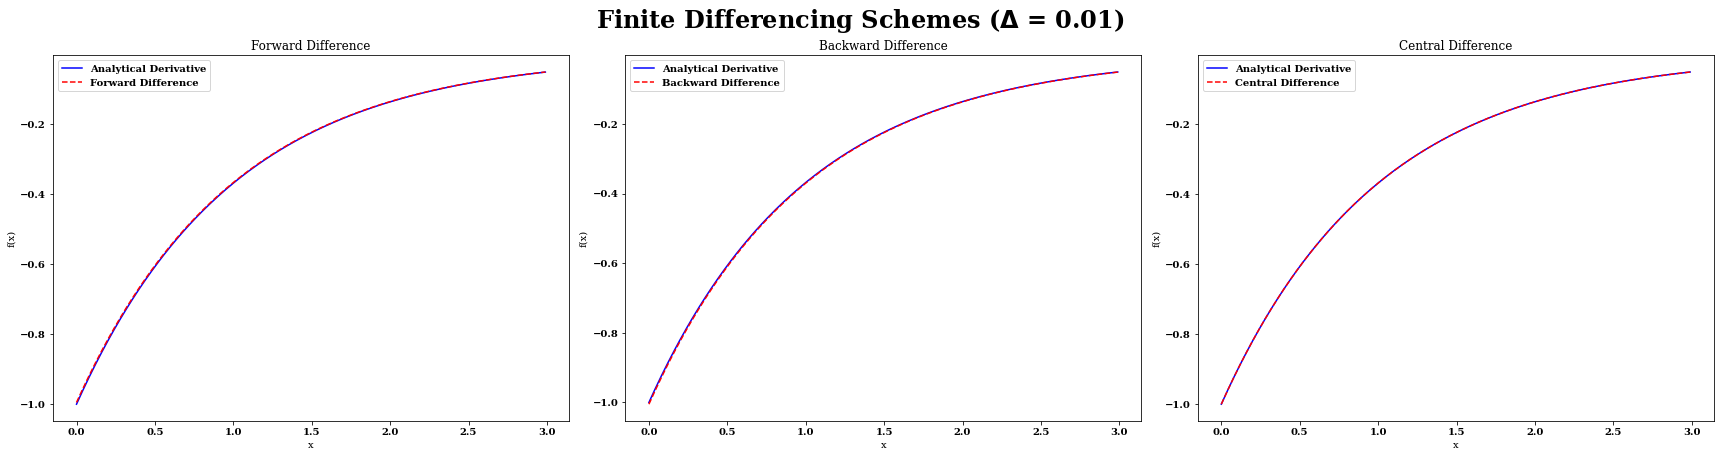

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Set the font properties for the plots
font = {'family': 'serif', 'weight': 'bold', 'size': 16}
matplotlib.rc('font', **font)

# Initialize step size
dx1 = 0.1
dx2 = 0.01

# Define the function
# f(x) = a * exp(-b * x) + c
def function(x):
    a = 1
    b = 1
    c = -6
    return a * np.exp(-b * x) + c

# Define the derivative of the function
# f'(x) = -a * b * exp(-b * x)
def function_derivative(x):
    a = 1
    b = 1
    return -a * b * np.exp(-b * x)

# Define the forward difference method
def forward_diff(x, dx, f):
    return (f(x + dx) - f(x)) / dx

# Define the backward difference method
def backward_diff(x, dx, f):
    return (f(x) - f(x - dx)) / dx

# Define the central difference method
def central_diff(x, dx, f):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

# Plot the analytical derivate and the numerical derivatives using the three finite differencing schemes
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
x = np.arange(0, 3, dx1)
ax[0].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[0].plot(x, forward_diff(x, dx1, function), label='Forward Difference', color = 'red', linestyle='--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_title('Forward Difference')
ax[0].legend()
ax[1].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[1].plot(x, backward_diff(x, dx1, function), label='Backward Difference', color = 'red', linestyle='--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].set_title('Backward Difference')
ax[1].legend()
ax[2].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[2].plot(x, central_diff(x, dx1, function), label='Central Difference', color = 'red', linestyle='--')
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
ax[2].set_title('Central Difference')
ax[2].legend()
fig.tight_layout()
fig.suptitle("Finite Differencing Schemes ($\Delta$ = 0.1)", fontsize=24, fontweight='bold', y = 1.05)

# Plot the analytical derivate and the numerical derivatives using the three finite differencing schemes
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
x = np.arange(0, 3, dx2)
ax[0].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[0].plot(x, forward_diff(x, dx2, function), label='Forward Difference', color = 'red', linestyle='--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_title('Forward Difference')
ax[0].legend()
ax[1].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[1].plot(x, backward_diff(x, dx2, function), label='Backward Difference', color = 'red', linestyle='--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].set_title('Backward Difference')
ax[1].legend()
ax[2].plot(x, function_derivative(x), label='Analytical Derivative', color = 'blue')
ax[2].plot(x, central_diff(x, dx2, function), label='Central Difference', color = 'red', linestyle='--')
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
ax[2].set_title('Central Difference')
ax[2].legend()
fig.tight_layout()
fig.suptitle("Finite Differencing Schemes ($\Delta$ = 0.01)", fontsize=24, fontweight='bold', y = 1.05)

a) The figures above show how forward, backward, and central differencing affects the error in the solution. The forward difference solution lags behind the analytical, while the backward difference is too far forward. The central differencing method is the most accurate. The second figure shows how decreasing the step size can improve the errors associated with these numerical methods. 

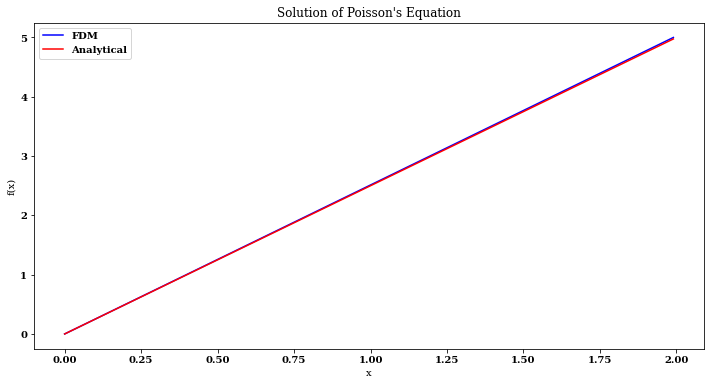

In [2]:
# Define analytical solution for Poisson's equation
def poisson(x):
    a = 2.5
    b = 0
    return a * x + b

# Define step size and grid points for finite difference method
dx = 0.01
x = np.arange(0, 2, dx)

# Define the finite difference method for Poisson's equation
# d^2V/dx^2 = 0
A = np.zeros((len(x), len(x)))
b = np.zeros(len(x))
for i in range(1, len(x) - 1):
    # Set up the finite difference matrix using second difference estimate
    A[i, i - 1] = 1 / dx**2
    A[i, i] = -2 / dx**2
    A[i, i + 1] = 1 / dx**2
    b[i] = 0

# Set boundary conditions
# V(0) = 0, V(2) = 5
A[0,0] = 1
A[-1,-1] = 1
b[0] = 0
b[-1] = 5

# Solve the linear system
# A * V = b
V = np.linalg.solve(A, b)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, V, label='FDM', color = 'blue')
ax.plot(x, poisson(x), label='Analytical', color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Solution of Poisson\'s Equation')
ax.legend()


b) The finite difference method is used to numerically solve the 1D Laplace equation $\nabla V = 0$ with boundary conditions $V(0) = 0$ and $V(2) = 5$. Evidently, the plot shows the numerical and analytical solutions align very well. 

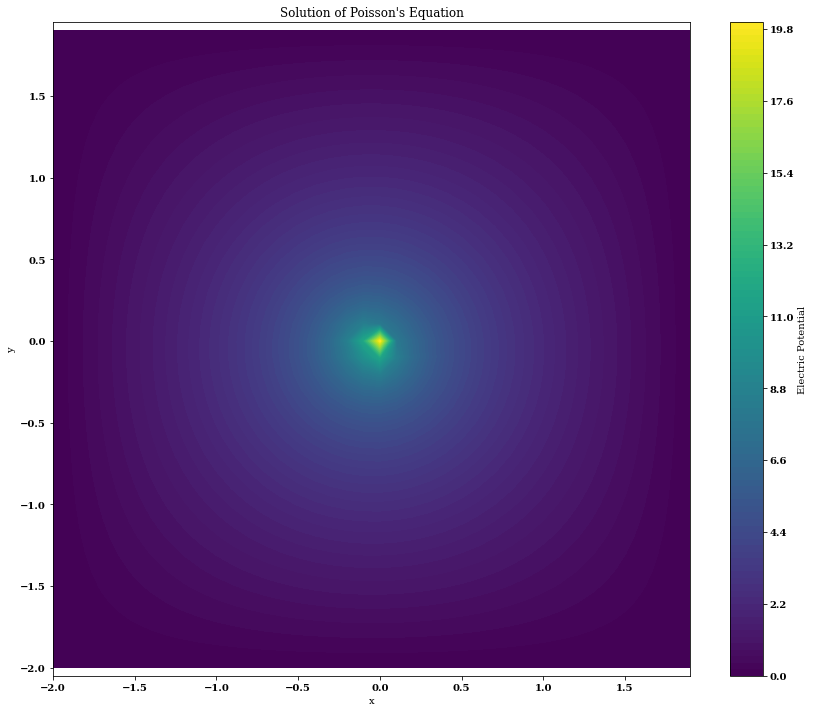

In [3]:
L = 4 # Length of the domain
q = 20 # Source term
dx = 0.1 # Step size
x = np.arange(-L/2, L/2, dx) # Grid points
y = np.arange(-L/2, L/2, dx) # Grid points
N = int(len(x)) # Number of grid points
wall = 0.0 # Boundary condition at the wall

A = np.zeros((N**2, N**2)) # Coefficient matrix
b = np.zeros(N**2) # Right-hand side vector

for i in range(1, N**2 - 1):
    # Set up the finite difference matrix using second difference estimate
    # East-West neigbours
    A[i, i - 1] = 1 / dx**2
    A[i, i] = -2 / dx**2
    A[i, i + 1] = 1 / dx**2
    b[i] = 0
# First entry
A[0,1] = 1 / dx**2
A[0,0] = -2 / dx**2
b[0] = 0
# Last entry
A[N**2-1, N**2-2] = -2 / dx**2
A[N**2-1, N**2-2] = 1 / dx**2
b[N**2-1] = 0

for i in range(N, N**2 - 1 - N):
    # North-South neighbours
    A[i, i - N] = 1 / dx**2
    A[i, i + N] = 1 / dx**2
    b[i] = 0
for i in range(N):
    # First and last rows
    A[i, i+N] = 1 / dx**2
    A[N**2-1 - i, N**2-1-(i+N)] = 1 / dx**2

# Set boundary conditions
for i in range(N):
    # Bottom boundary
    A[i,:] = 0
    A[i, i] = 1
    b[i] = wall

    # Top boundary
    A[N**2-1 - i,:] = 0
    A[N**2-1 - i, N**2-1 - i] = 1
    b[N**2-1 - i] = wall

    # Left boundary
    A[i*N-1,:] = 0
    A[i*N-1, i*N-1] = 1
    b[i*N-1] = wall

    # Right boundary
    A[i*N + N - 1,:] = 0
    A[i*N + N - 1, i*N + N - 1] = 1
    b[i*N + N - 1] = wall

# Set the source term in the center of the grid
center = int(N**2/2 + N/2)
A[center, :] = 0
A[center, center] = 1
b[center] = q

# Solve the linear system
V = np.linalg.solve(A, b)
V = V.reshape((N, N))
xx, yy = np.meshgrid(x, y)

# Iterative method to solve Poisson's equation
for it in range(1000):
    tolerance = 1e-5
    for i in range(1, N-1):
        for j in range(1, N-1):
            old = V[i, j]
            V[i, j] = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
            max_diff = max(tolerance, abs(V[i, j] - old))

    # Update source and boundaries if needed
    V[N//2, N//2] = q
    V[0,:] = V[-1,:] = V[:,0] = V[:,-1] = wall

    if max_diff < 1e-5:
        break


# Plot the results
fig, ax = plt.subplots(figsize=(12,10))
fig.colorbar(ax.contourf(xx, yy, V, levels=100, cmap='viridis'), ax=ax, label=r'Electric Potential')
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Solution of Poisson\'s Equation')
fig.tight_layout()

d) BONUS

A point charge q is located at the center point of a LxL grid with boundary conditions along the walls of the grid being zero. 

